In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/Advertising.csv", index_col=0) # index_col=0 tar bort första index kolumnen
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## EDA - Exploratory data analysis

* vi vill alltid börja med detta

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
df.describe().T # transponerar

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.shape # 200 samples, 3 features(TV, Radio, Newspaper), 1 label (Sales; predicted variable)

(200, 4)

Ser ut som att det är någon form av positiv korrelation på TV och Radio. Newspaper verkar vara mindre korrelerat

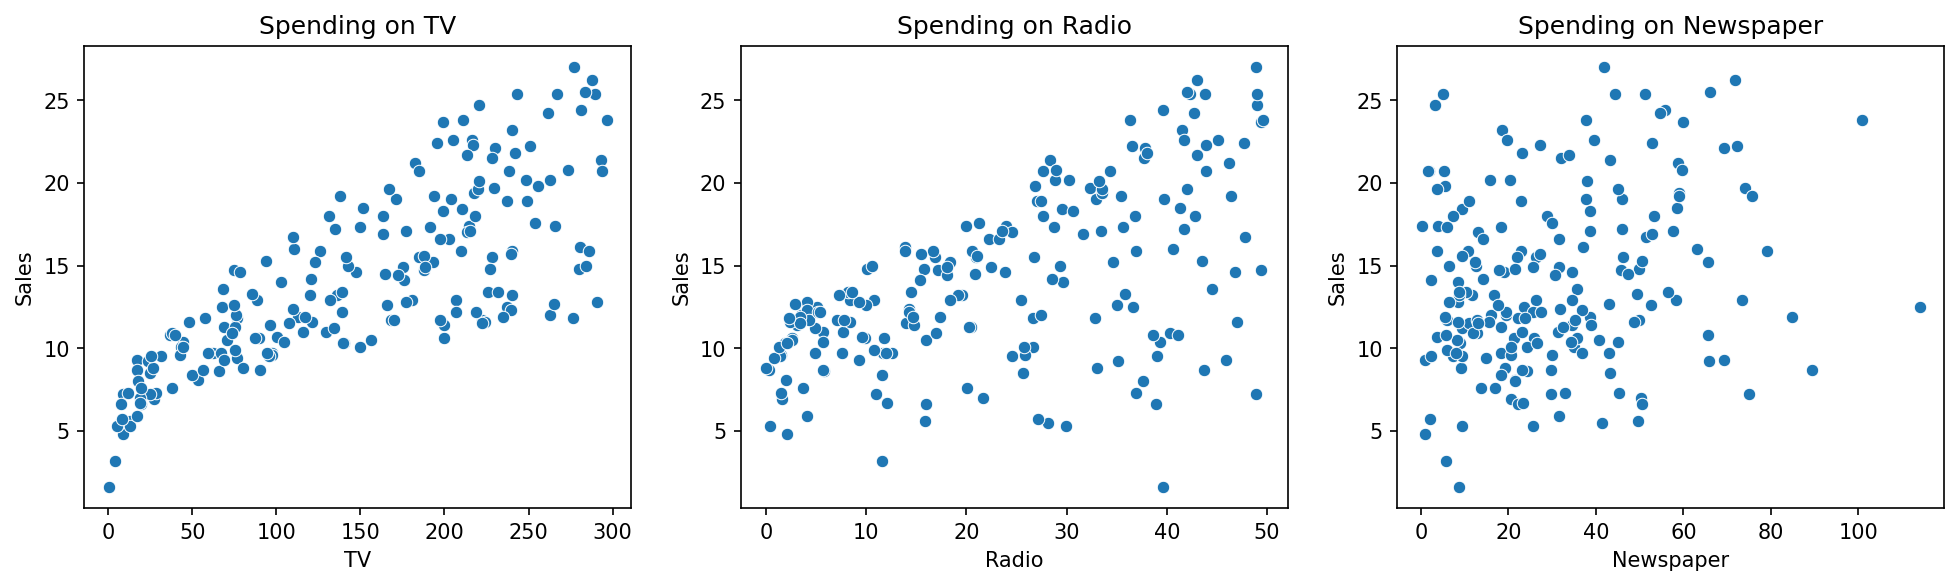

In [10]:
number_features = df.shape[1]-1 # för att kunna skapa olika plottar

#number_features

fig, ax = plt.subplots(1, number_features, figsize = (16,4), dpi = 150) #"1" = number of rows/columns of the subplot. default = 1.

for i, feature in enumerate(df.columns[:-1]): # alla förutom sales column
    sns.scatterplot(data = df, x = feature, y="Sales", ax=ax[i]) # utan ax=ax[i] hamnar alla punkter i den sista plotten.
    # eftersom jag loopar gneom i och feature, så skrivs index [0] ut och sedan "Sales", som vi har tagit bort från vår dataframe.
    # loop 1; index[0] = TV, "Sales"
    # loop 2; index[1] = Radio, "Sales"
    # loop 3; index[2] = Newspaper, "Sales"
    ax[i].set_title(f"Spending on {feature}")

plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:

* fig, ax = plt.subplots()

is more concise than this:

* fig = plt.figure()
* ax = fig.add_subplot(111)

### annat sätt att göra i princip samma plot

Text(0.5, 0.98, 'Spending on medium compared to sales')

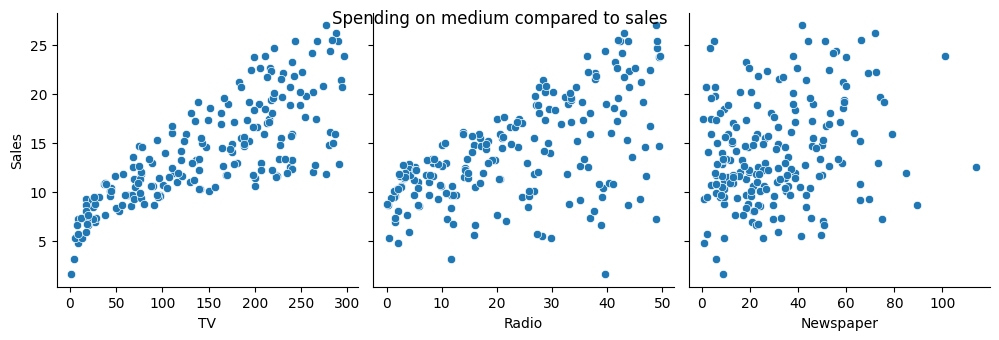

In [8]:
# notera att det inte går att sätta individuella titlar lika enkelt, men man kan snabbt och enkelt göra plots som ovanstående, fast på enbart en kodrad.
sns.pairplot(df, y_vars="Sales", x_vars = df.columns[:-1], height=3.38)
plt.suptitle("Spending on medium compared to sales")

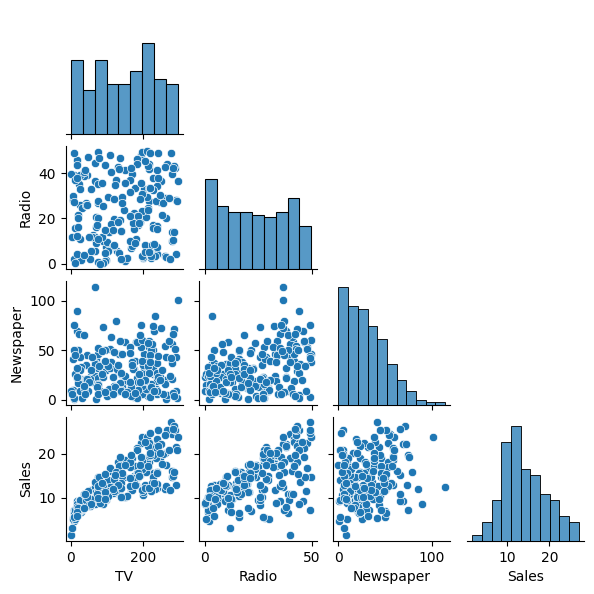

In [ ]:
ax = sns.pairplot(df, height = 1.5, corner=True)

## Simple linear regression

In [11]:
X, y = df["TV"], df["Sales"]

X

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
       ...  
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64

In [12]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [14]:
beta_1, beta_0 = np.polyfit(X, y, deg=1)
beta_0, beta_1

(7.032593549127696, 0.04753664043301972)

[Text(0.5, 1.0, 'Regression line on TV advertisment and sales')]

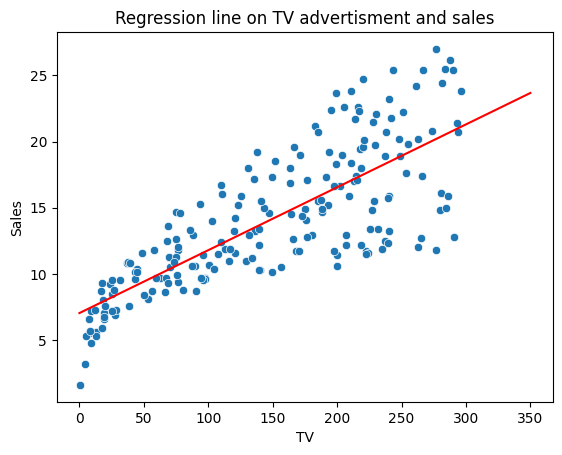

In [20]:
y_hat = lambda x: beta_0 + beta_1*x

spending = np.linspace(0, 350)

ax = sns.scatterplot(data = df, x = "TV", y = "Sales")
sns.lineplot(x = spending, y=y_hat(spending), color = "red")
ax.set(title = "Regression line on TV advertisment and sales")

<AxesSubplot: xlabel='TV', ylabel='Sales'>

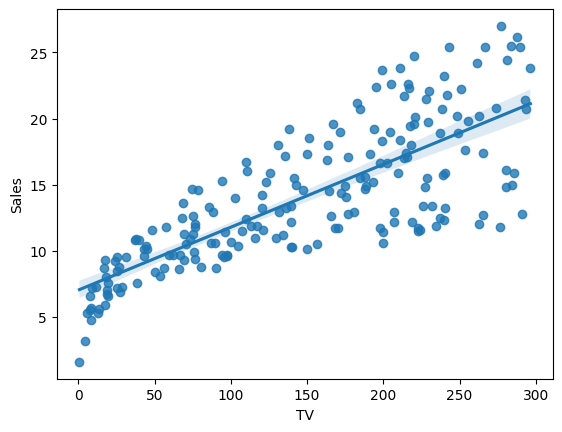

In [26]:
sns.regplot(x=X, y=y)

## Multiple linear regression

In [30]:
X, y = df.drop("Sales", axis="columns"), df["Sales"]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [32]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [ ]:
X.insert(0, "Intercept", 1) # insert muterar, 0 är positionen. 

In [37]:
X.head()

,Intercept,TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4


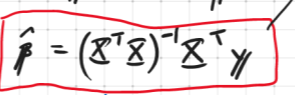
* detta har vi gjort, XtX

In [39]:

# @ operator - matmul operator
# in numpy - the matmul operator is operator overloaded to handle matrix multiplication
X.T@X

,Intercept,TV,Radio,Newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


In [40]:
np.linalg.inv(X.T@X) # inverterat

array([[ 3.42444998e-02, -9.35348333e-05, -3.92647297e-04,
        -2.08036831e-04],
       [-9.35348333e-05,  6.84890750e-07, -1.57355890e-07,
        -1.14959987e-07],
       [-3.92647297e-04, -1.57355890e-07,  2.61016474e-05,
        -6.26574016e-06],
       [-2.08036831e-04, -1.14959987e-07, -6.26574016e-06,
         1.21328472e-05]])

In [42]:
# normal equation - OLS
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

### Gör en funktion av detta istället

In [44]:
regression_fit = lambda X,y: np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(X,y)

beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

### Prediction

In [50]:
predict = lambda x, beta: np.dot(x, beta) # skalärprodukt

test_sample = [1, 230, 38, 69]
y_hat = predict(test_sample, beta_hat)
print(f"With $230k on TV, $38k on Radio and $69k on newspaper we get a predicted sales on {y_hat:.1f}k units")

With $230k on TV, $38k on Radio and $69k on newspaper we get a predicted sales on 20.6k units


## Train|test split

In [95]:
train_fraction = int(len(df)*0.7)

train = df.sample(n=train_fraction, random_state=42, replace=False) # plockar ut från vår df, "plockar ut bollar", lägger inte tillbaka. random sampling.
train.head()

,TV,Radio,Newspaper,Sales
96,163.3,31.6,52.9,16.9
16,195.4,47.7,52.9,22.4
31,292.9,28.3,43.2,21.4
159,11.7,36.9,45.2,7.3
129,220.3,49.0,3.2,24.7


In [62]:
test = df.drop(train.index)
train.shape, test.shape # shape visar hur många rader och kolonner

((140, 4), (60, 4))

In [74]:
X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"] # droppar 60 från test
X_test, y_test = test.drop("Sales", axis="columns"), test["Sales"]  # droppar 140 från train

X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 4), (140,), (60, 4), (60,))

### Prediction

In [80]:
beta_hat = regression_fit(X_train, y_train)
print(f"Beta parameters:\n{beta_hat}")

predict = lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (4,1)) # reshapar

y_hat = predict(X_test, beta_hat).to_numpy() # gjort prediction på alla våra test

y_hat[:5] # prediction for the first 5 values

Beta parameters:
0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [92]:
X_test.iloc[1] # 1 = 12.19125728 från arrayn ^
# spending $120.2k on TV, $19.6k on radio and $11.6k on newspaper gives prediction on 12.19k units

Intercept      1.0
TV           120.2
Radio         19.6
Newspaper     11.6
Name: 8, dtype: float64

## Evaluate model performance

In [101]:
m = len(y_test)

# removed extra dimension (60,1) -> (60,)
y_hat = np.reshape(y_hat, (m))

mean_absolute_error = 1/m*np.sum(np.abs(y_test-y_hat)) # summerar differensen av y_test och y_hat. dividerar på längden av y_hat
mean_squared_error = 1/m*np.sum((y_test-y_hat)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)

# 1 000 enheter, 1 000 000 enheter, 1 000 enheter
mean_absolute_error, mean_squared_error, root_mean_squared_error

(1.3244490959726523, 3.540425618238498, 1.8816018755939041)